<a href="https://colab.research.google.com/github/raisa1521/Hands-on-Machine-Learning/blob/main/2%EC%9E%A5_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B2%98%EC%9D%8C%EB%B6%80%ED%84%B0_%EB%81%9D%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 큰 그림을 봅니다.

2 데이터를 구합니다.

3 데이터로부터 인사이트를 얻기 위해 탐색하고 시각화합니다.

4 머신러닝 알고리즘을 위해 데이터를 준비합니다.

5 모델을 선택하고 훈련시킵니다.

6 모델을 미세 튜닝합니다.

7 솔루션을 제시합니다.

8 시스템을 론칭하고, 모니터링하고, 유지 보수합니다.

#실제 데이터로 작업하기
pg.69 - 데이터 구하는 곳
#큰 그림 보기
**<문제정의>**

파이프라인 : 데이터 처리 컴포넌트들이 연속되어 있는 것(-보통 비정기적으로 작동)

1. 컴포넌ㅌ트는 많은 데이터를 추출해 처리하고 그 결과를 다른 데이터 저장소로 보냄.
2. 파이프라인의 다음 컴포넌트가 그 데이터를 추출해 자신의 출력 결과를 만들어냄.(각 컴포넌트 독립적), 인터페이스 = 저장소
- 시스템 이해하기 쉽고, 각자의 컴포넌트에 집중할 수 있게 함. 시스템이 견고해짐.

-데이터가 너무 클 땐, **맵리듀스** 기술 활용\

**<선은 측정 지표 선택>**

회귀문제 전형적인 성능 지표 - 평균 제곱근 오차(RMSE)
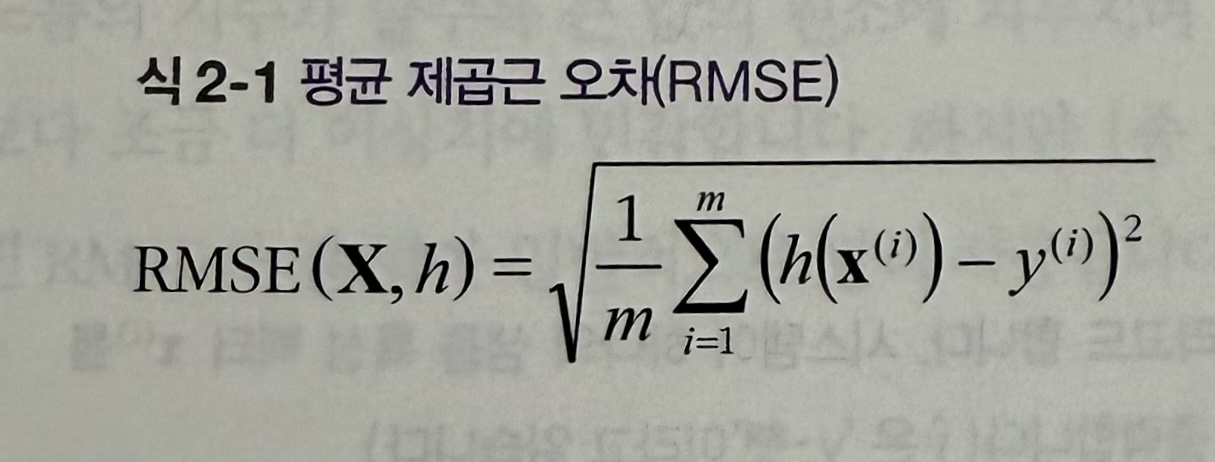

pg.73 - 표기법 : 스칼라값이나 함수를 나타낼 때는 m이나 y 또는 h와 같이 기울어진 소문자, 벡터를 나타낼 때 는 x)와 같이 굵은 소문자, 행렬을 나타낼 때는 X와 같이 굵은 대문자를 사용하겠습니다.

이상치가 많은 구간에서는 **평균 절대 오차**(평균 절대 편차) 사용

- RMSE와 MAE 모두 예측값의 벡터와 타깃값의 벡터 사이 거리를 재는 방법이지만 상황에 따라 다르게 사용

**노름(norm)** : 거리 측정 방법(유클리드 노름, 맨해튼 노름)

- 노름 지수가 클 수록 큰 값의 원소에 치우치며 작은 값은 무시됨. so RMSE가 MAE보다 이상치에 민감

**<가정 검사>**


# 데이터 가져오기

**<구글 코랩을 사용하여 예제 코드 실행하기>**

**런타임** : 무료가상 머신


**<코드와 데이터 저장하기>**


**<대화식 환경의 편리함과 위험>**

**<책의 코드와 노트북의 코드>**

**<데이터 다운로드>**

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():                                  #load_housing_data()함수-datasets/housing.tgz파일 찾음
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True,exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv")) #csv파일의 모든 데이터를 판다스 데이터 프레임으로 로드 후 객체변환

housing = load_housing_data()

/tmp/ipython-input-3331060754.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


**<데이터 구조 훑어보기>**

head() 매서드 : 데이터에 있는 n행 확인

info() 매서드 : 데이터에 관한 간략한 설명 - 전체 행 수, 각 특성의 데이터 타입과 널(null)이 아닌 값의 계수를 확인하는데 유용

value_counts 매서드 : 어떤 카테고리가 있고 각 카테고리마다 얼마나 많은 구역이 있는지 확인

In [2]:
housing["ocean_proximity"].value_counts()    #value count() 매서드

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


count, mean, max, min std, 백분위수(사분위수) - 나타내는게 무엇인지 알기

describe() 매서드 : 숫자형 특성의 요약 정보를 보여줌

-데이터 형태 빠르게 검토하는 방법 - 각 숫자형의 특성을 히스토그램으로 그려보는 것

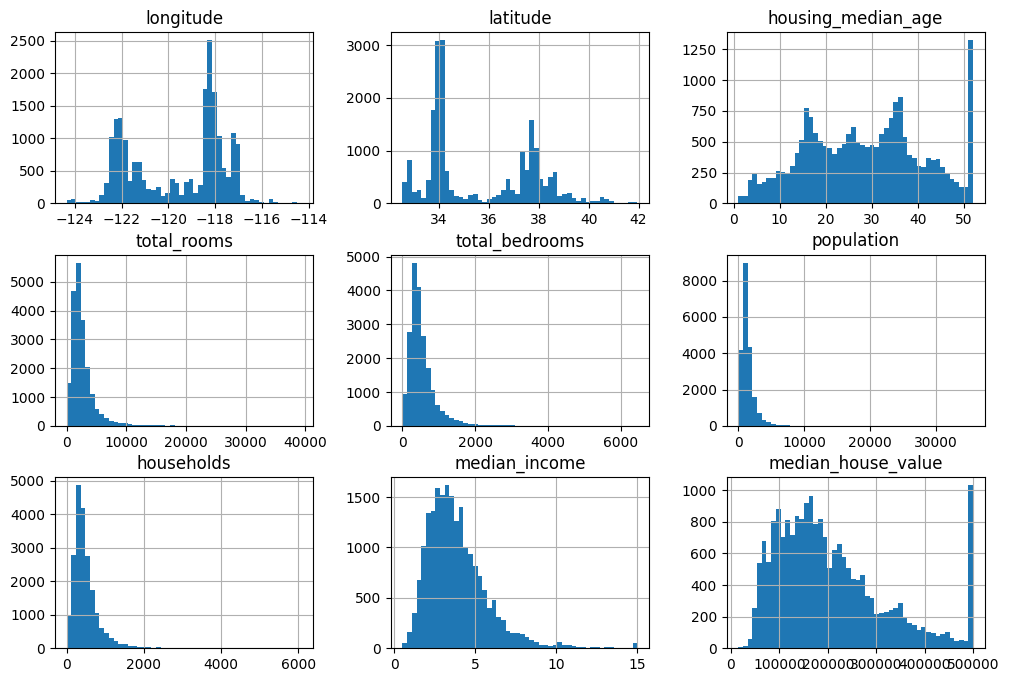

In [3]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8)) #housing.hist() 매서드 : 모든 수자형 특성에 대한 히스토그램을 출력
plt.show()

위를  통해 알 수 있는 것

1. 중간소득 특성은 대략 수만달러

2.  중간주택연도와 중간주택가격 최댓값과 최솟값을 한정함 - 정확한 예측 어려움

3.특성들의 스케일이 서로 많이 다름

4.오른쪽 꼬리가 더 김. - 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만듬

#테스트세트 만들기

데이터 스누핑 편향 : 일반화 오차를 추정하면 매우 낙관적인 추정이 되며 시스템을 론칭했을때 기대한 성능이 나오지 않는 것

In [4]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [5]:
train_set, test_set_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

위코드- 완벽하지 않음

np.random.permutation() : 항상 같은 난수 인덱스가 생성되도록 하는 함수

np.random.seed() : 난수 발생기의 초깃값을 지정하는 것

-> 업데이트된 데이터셋을 사용할때 문제가 됨



In [6]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [7]:
housing_with_id = housing.reset_index()
# index 열이 추가된 데이터프레임이 # 반환됩니다.
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

-행의 인덱스를 ID로 사용

-안전한 특성을 사용해야함

In [8]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

train_test_split : 데이터셋을 여러 서브셋으로 나누는 방법

- shuffle_and_split_data()함수와 비슷
- 난수 초깃값을 지정할 수 있는 random_state 매개변수가 있음
- 행의 개수가 같은 여러 개의 데이터셋을 넘겨서 동일한 인덱스 기반으로 나눌수 있음

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

- 순수한 랜덤 샘플링 방식

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missin

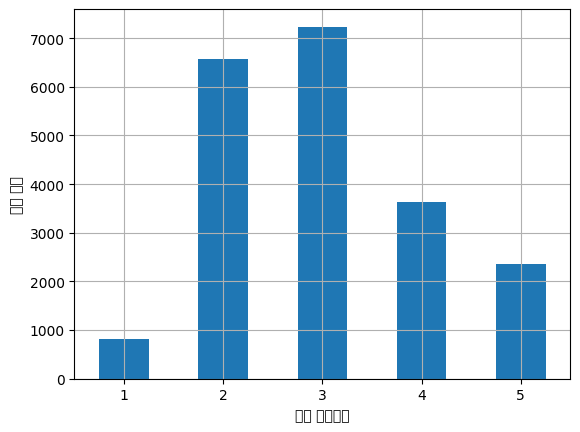

In [11]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel ("구역 개수")
plt.show

pd.cut() 함수 : 카테고리의 특성을 만듬.

sklearn.model_selection 패키지 : 사이커럿이 여러가지 클래스 제공

분할기 : 데이터셋을 훈련 세트와 테스트 세트로 분할하는 다양한 전략을 구현 -  split() 메서드로 분할

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
start_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  start_splits.append([strat_train_set_n, strat_test_set_n])

In [13]:
start_train_set, start_test_set = start_splits[0]

train_test_split() 함수와 stratify매개변수를 사용하여 간편하게 만듬

In [14]:
start_train_set, start_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [15]:
start_test_set["income_cat"].value_counts() / len(start_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


income_cat 특성을 다시 사용하지 않으므로 열을 삭제하고 데이터를 원래 상태로 되돌림

In [16]:
for set_ in (start_train_set, start_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

#데이터 이해를 위한 탐색과 시각화

In [17]:
housing = start_train_set.copy()

**지리적 데이터 시각화하기**

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


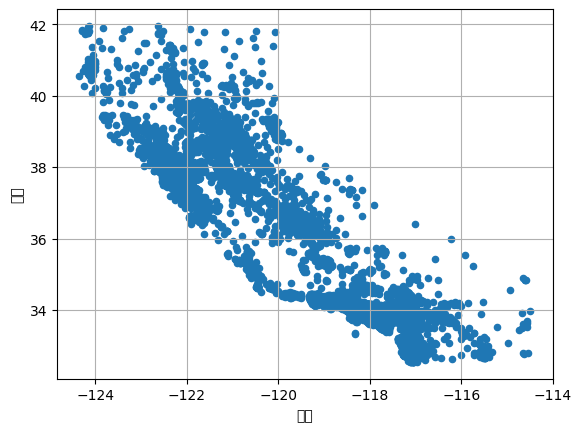

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

alpha 옵션을 0.2로 주면 데이터 포인트가 밀짐된 영역을 잘 보여줌

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


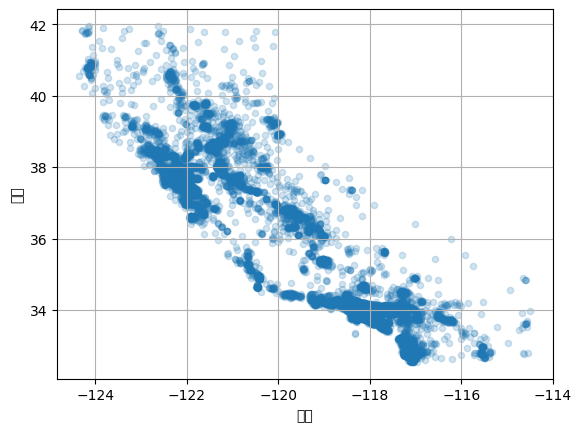

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

매개변수 camp

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

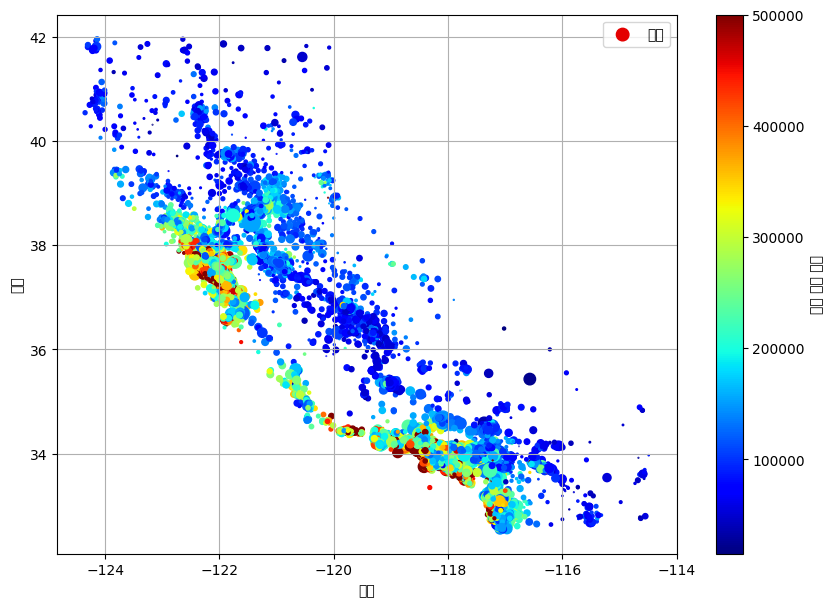

In [20]:
housing.plot(kind="scatter",x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label="인구",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10,7))
cax=plt.gcf().get_axes()[1]
cax.set_ylabel("중간 주택 가격")
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

**상관관계 조사하기**
1. corr() 매서드 - 표준상관계수(피어슨) 계산
2. scatter_matrix함수 - 숫자형 특성간 산점도 그림

In [21]:
corr_matrix = housing.corr(numeric_only=True) #corr() 매서드

계수 1에 가까움 - 양의 상관계수

계수 -1에 가까움 - 음의 상관계수

계수 0 - 선형적 상관계수 없음

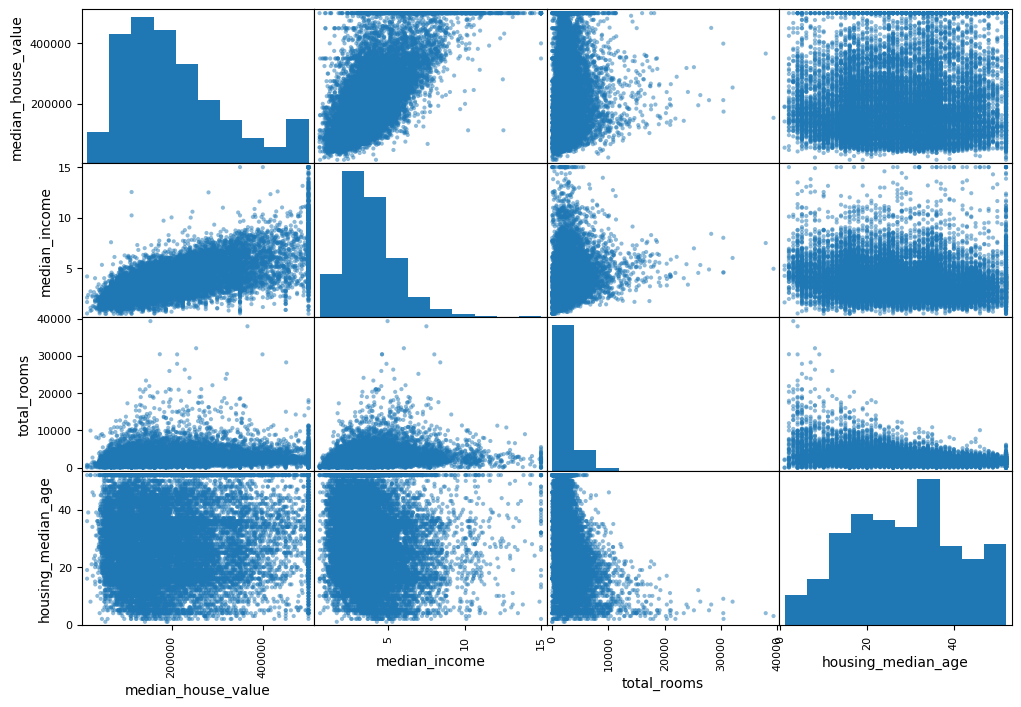

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

중간 주택 가격, 중간소득 산점도 확대

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

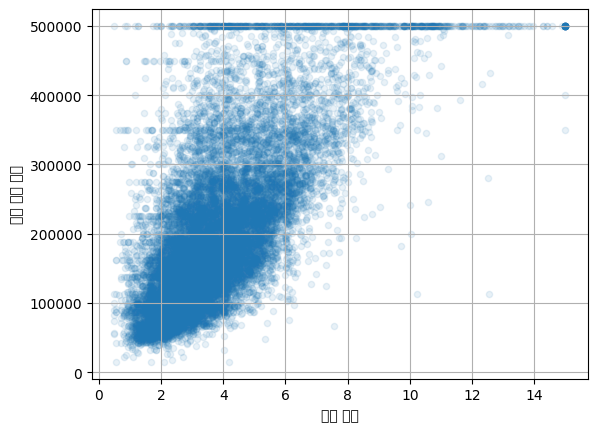

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True) #scatter_matrix함수
plt.xlabel("중간 소득")
plt.ylabel("중간 주택 가격")
plt.show()

위 산점도가 나타내는 것

1. 상관관계가 매우 강하다
2. 가격의 한곗값이 500,000에서 수평선으로 나타남 - 알고리즘 데이터에서 이 형태 학습하지 않도록 할 수 있음

**특성조합으로 실험하기**

가구 인원과 같은 특성 만들기

In [24]:
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["people_per_house"] = housing["population"]/housing["households"]

In [25]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


#머신러닝 알고히즘을 위한 데이터 준비

데이터는 수동이 아닌 자동화 필요한 이유
1. 다음 새로운 데이터셋을 사용할 때 사용할 수 있음
2. 향후 프로젝트에 재사용 가능한 변환 라이브러리를 점진적으로 구축할 수 있음
3. 실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 이 함수를 사용해 변환 가능
4. 여러가지 데이터 변환을 쉽게 시도해볼 수 있고 어던 조합이 가장 좋은지 확인하는 것도 편리함

**방법**
 - 원래 훈련세트로 복원 - 예측변수와 레이블 분리(예측변수와 타깃값에 같은 변형을 적용하지 않기 위해)

이때 사용되는 매서드(= drop())

In [26]:
housing = start_train_set.drop("median_house_value", axis=1)
housing_label = start_train_set["median_house_value"].copy()

**2.5.1 데이터 정제**

대부분 머신러닝 알고리즘은 누락된 특성을 다루지 못해 이를 처리할 수 있는 함수 만들기

1. 해당구역 제거
2. 전체특성을 삭제
3. 누락된 값을 어떤 값으로 채움(=대체)

dropna(), drop(), fillna() 매서드 사용


In [27]:
housing = start_train_set.drop("median_house_value", axis=1)

# housing.dropna(subset=["total_bedrooms"], inplace=True) #옵션1

# housing.drop("total_bedrooms", axis=1, inplace=True) #옵션2

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) # 옵션3

/tmp/ipython-input-3995388079.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True) # 옵션3


옵션3 대신 **simpleimputer 클래스** 사용

**simpleimputer 클래스** : 각 특성의 중간값을 저장에 유용(훈련데이터셋뿐만 아니라 검증 세트와 테스트세트, 새로운 데이터에 있는 누락된 값을 대체할 수 있음)

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

중간값은 수치형 특성에만 계산될 수 있어 수치 특성만 가진 데이터 복사본을 생성(= 텍스트 특성인 ocean_proximity가 제외됨)

In [29]:
housing_num = housing.select_dtypes(include=[np.number])

이제 imputer 객체의 fit()매서드를 사용해 훈련데이터 적용 가능

In [30]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

imputer = 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장

tota;_bedrooms 특성에만 누락된 값이 있지만 나중에 서비스 될 때 새로운 데이터에서 어떤 값이 누락될지 확신할 수 x - 모든 수치형 특성에 imputer를 적용하는 것이 바람직

In [31]:
imputer.statistics_

housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

이제 학습된imputer객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간 데이터로 바꿀 수 o

In [32]:
X = imputer.transform(housing_num)

누락된 값을 평균(startegy="mean") 이나 가장자주 등장하는 값(strategy="mostfrequent")또는 상수(strategy="constant",fill_value=...)로 바꿀 수 있음

In [33]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

**2.5.2텍스트와 범주형 특성 다루기**

데이터 셋 : ocean_proximity

In [34]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


대부분 머신러닝 알고리즘은 숫자형이기 때문에

OrdinaEncoder를 이용해 텍스트->숫자

In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

categories_ 인스턴스변수를 활용해 카테고리 리스트 얻을 수 o

In [36]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

-----이 표현은 머신러닝 알고리즘이 가까이 있는 두 값을 떨어져있는 두 값보다 더 비슷하다고 생각해서 문제가 됨-------

원-핫 인코딩 : 한 특성만 1이고 나머지는 0인 코딩

사이커럿이 원-핫 벡터로 바꾸기 위한 OneHotEncoder틀래스 제공

In [37]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot #넘파이 배열이 아닌 희소행렬

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

희소행렬 = 0이 대부분인 행렬을 효율적으로 표현

넘파이 행렬로 바꾸려면

toarray()매서드 호출해야함

or OrdinalEncoder를 만들 때 spares=False로 설정하여 transform() 매서드가 넘파이 배열을 반환하게 할 수 있음

or OrdinalEncoder처럼 인코더의 categories_ 인스턴스 변수를 사용해 카테고리 리스트를 얻기

In [38]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [39]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

get_dummies() 함수 : 판다스에서 범주형 특성을 원-핫 표현으로 바꿔서 카테고리마다 하나의 이진 특성을 만듬

In [40]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


OneHotEncoder -어떤 카테고리로 훈련되었는지 기억

----cat_encoder를 fit_transform()이 아니라 transform()으로 df_test에 적용하면?----


In [41]:
cat_encoder.transform(df_test) #하나의 열을 순서대로 출력

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (2, 5)>

get_dummies()에 주입하면

In [42]:
df_test_unkown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unkown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


OneHotEncoder - 알 수 없는 카테고리를 감지하고 예외 발생시킴, handle_unkown매개변수를 "ignore"로 지정하여 알 수 없는 카테고리를 그냥 0으로 나타냄

In [43]:
from sklearn.preprocessing import OneHotEncoder ##이거 다시 해야함

cat_encoder = OneHotEncoder()
# 이전 셀에서 fit_transform을 호출했으므로, 여기서는 fit_transform 대신 fit을 호출합니다.
cat_encoder.fit(housing_cat)
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unkown)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (2, 5)>

열 이름을 feature_names_in_ 속성에 저장

사이킷럿은 transform()이나 presoct()를 통해 이 추정기에 입력된 모든 데이터프레임이 동일한 열 이름을 갖는지 확인


In [44]:
from sklearn.pipeline import Pipeline ##이거 다시해야함
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

**2.5.3 특성 스케일과 변환**

특성 스케일링 : 데이터에 적용할 중요한 변환

min-amx 스케일링, 표준화 : 모든 특성의 범위를 같게 만들어주는 방법

-스케일링은 훈련데이터로만 수행 fit(), fit_transform() 매서드를 사용해서는 안됨.

-스케일링 변환기를 훈련하고 나면 이를 이용해 검즌 세트,테스트 세트, 새로운 데이터에 transform() 매서드를 적용할 수 있음

-훈련데이터 값은 한상 특성 범위로 스케일링 되지만 새로운 데이터에 이상치가 있다면 이 범위 밖으로 스케일링 됨. 이를 원하지 않으면 MinMaxScaler의 clip매개변수 True로 지정

min-max스케일링, 정규화 : 스케일 조정(데이터 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나누면 됨)

사이킷럿에는 이 역할을 하는 MinMaxScalar 변환기를 제공하며 feature_range 매개변수를 이용해 다른 범위로 변경가능

In [45]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max = min_max_scaler.fit_transform(housing_num)

표준화는 다름 - 먼저 평균을 뺀 후 표준편차로 나눔

-min-max스테일링과 달리 표준화는 특정 범위로 값을 제한하지 않음

그러나 표준화는 이상치에 영향을 덜 받음

StandardScalar변환기 : 사이킷럿에 있는 표준화 변환기

In [46]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std = std_scaler.fit_transform(housing_num)

희소 행렬을 밀집 행렬로 바꾸지 않고 스케일링 하고 싶으면 StandardScalar를 사용할 때 with_mean 하이퍼파라미터를 False로 지정

-이렇게 하면 데이터에서 평균을 빼지 않고 표준편차로 나누기만 함(희소성을 깨지 않음)

**멱법칙 분포** : 특성분포의 꼬리가 아주 길고 두꺼움 - 로그값으로 바꾸는것 도움이 됨.

**방사기저 함수** - 유사도 측정은 일반적으로 입력값과 고정포인트 사이의 거리에만 의존할 때 사용하는 기법

In [53]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]],[[35]],gamma=0.1)

감마 값이 작을 때 특성이 어떻게 나타나는지 보여줌

- 새로운 연도 유사도 특성은 중간주택 연도의 정점 근처인 35에서 정점
- 데이터가 낮은 가격과 상관관계가 있다면 이 새로운 특성이 도움이 될 가능성이 높음

inverse_transform() 매서드 - 사이킷런 변환기에 있는 역변환을 수행하는 매서드

ex) StandardScaler를 사용하여 레이블 스케일링 - 스케일링된 레이블로 간단한 선형회귀 모델을 훈련하고 새로운 데이터에서 예측을 만듬 -변환기에 inverse_transform()매서드를 이용해 원본 스케일링을 돌림

StandardScaler는 2D입력을 기대하기 때문에 레이블의 판다스 시리즈에서 데이터프레임으로 변환함

In [59]:
from sklearn.linear_model import LinearRegression
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_label.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

더 간단한 방법은 TrannsformedTargetRegressor를 사용하는 것

회귀모델의 predict()매서드를 호출하고 변환기 inverse_transform()매서드를 사용하여 예측을 생성함

In [63]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_label)
predictions = model.predict(some_new_data)

**2.5.4 사용자 정의 변환기**

로그 변환기를 만들어 population특성 적용

In [64]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

inverse_func매개변수는 선택사항

ex) TransformedTargetRegressor에 변환기를 사용하려면 inverse_func메개변수에 역변환 함수를 지정할 수 있음, 가우스 RBF유사도를 계산하는 변환기를 다음과 같이 만들 수 있음

In [66]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])